In [1]:
import os
import sys
import pandas as pd

In [2]:
path_dir = (os.path.dirname(os.getcwd()))
sys.path.append(path_dir)
    
from homecredit.data import HomeCredit
from homecredit.preparation import Preparation
from homecredit.cleaner import Cleaning
from homecredit.exploration import Exploration
from homecredit.encoder import Encoder
from homecredit.model import Modeling

In [3]:
from sklearn.linear_model import LogisticRegression
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.neighbors import KNeighborsClassifier

import pickle

# Load models from pickle file

In [5]:
# Load model from pickle file
my_model = pickle.load(open("models.pckl","rb"))

my_model

[{'Name ': 'LR',
  'Model ': LogisticRegression(max_iter=1000),
  ' scoring': 'accuracy',
  ' train score': 0.9134809092893548,
  'time_run (mins)': 2.852945601940155},
 {'Name ': 'DTC',
  'Model ': DecisionTreeClassifier(),
  ' scoring': 'accuracy',
  ' train score': 0.8442406603005219,
  'time_run (mins)': 7.018933931986491}]

# Call data to predict

In [6]:
# this cell includes data to predict after transformation : clening missvalues, removing outliers, encoding
EN = Encoder(data_set='test')
EN.data.shape

(39431, 121)

# Model Prediction for new data

In [4]:
ml = Modeling()

In [5]:
ml.data.head(2)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,terraced house,Block,Mixed,Monolithic,Others,Panel,"Stone, brick",Wooden,No,Yes
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0,0,1,0,1,0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,1,0,0,0,0,0,0,1,0


In [6]:
res = ml.predict_newdata(LogisticRegression(max_iter=1000))

In [7]:
res

{'Predictions': array([0, 0, 0, ..., 0, 0, 0])}

In [8]:
res['Predictions'].shape

(39431,)

# Plot predicted Targets

In [9]:
y = res['Predictions']

df = pd.DataFrame(data=y, columns=["target"])
targ = 'target'
df.head()

,target
0,0
1,0
2,0
3,0
4,0


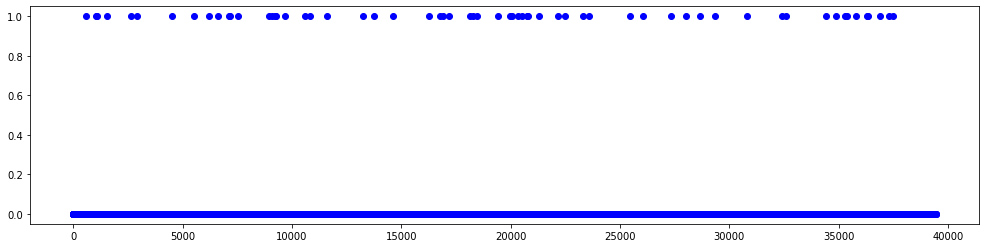

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (17, 4))
plt.plot(range(0, len(y)),y , 'bo') 

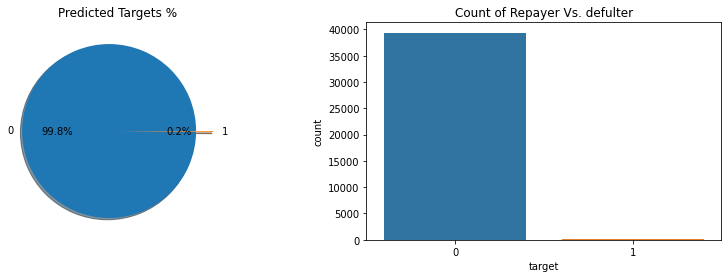

In [18]:
dataframe = (df[targ].value_counts() / len(df)).to_frame()
           
fig, ax=plt.subplots(1,2,figsize=(14,4))

df[targ].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,ax=ax[0])
ax[0].set_title("Predicted Targets %")
ax[0].set_ylabel('')

sns.countplot(x = targ, data = df, ax=ax[1])
ax[1].set_title('Count of Repayer Vs. defulter')

plt.show()

## Preparation().targetVar()

***Let's plot targets using : Preparation().targetVar(self, targ= "TARGET", other_df=False)***

In [10]:
prep = Preparation()

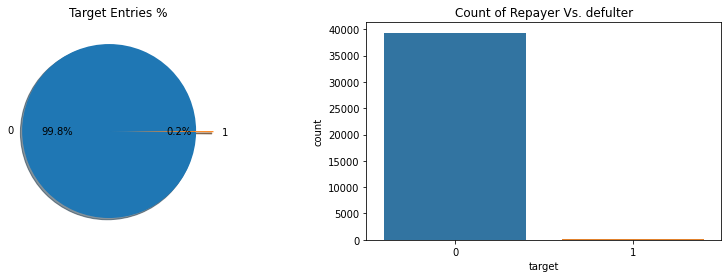

,target
0,0.997997
1,0.002003


In [11]:
prep.targetVar(targ="target", other_df= df)